### heatmap
* 행정구역별 (전국제외) vs. 시점
* 사망명수

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [3]:
current_font_list= matplotlib.rcParams['font.family']

font_path ="C:\Windows\Fonts\GULIM.TTC"
kfont = matplotlib.font_manager.FontProperties(fname= font_path).get_name()
matplotlib.rcParams['font.family'] = [kfont] + current_font_list

pd_data = pd.read_csv('시도별_화재발생_현황_총괄__20230307153201.csv', encoding='cp949')
print(pd_data)

       행정구역별    시점  건수 (건) 사망 (명)  부상 (명)  재산피해(계) (천원)   부동산 (천원)    동산 (천원)  \
0         전국  2010   41863    304    1588     266776332  117808118  148968214   
1         전국  2011   43875    263    1599     256547614  113257928  143289686   
2         전국  2012   43249    267    1955     289493719  127500018  161993701   
3         전국  2013   40932    307    1877     434462330  178812680  255649650   
4         전국  2014   42135    325    1856     405356513  168824616  236531897   
..       ...   ...     ...    ...     ...           ...        ...        ...   
209  제주특별자치도  2017     751      5      19       3944602    2022493    1922109   
210  제주특별자치도  2018     636      4      23       3956895    1199603    2757292   
211  제주특별자치도  2019     607      3      33       2998401    1088297    1910104   
212  제주특별자치도  2020     515     12      14       4905209    1964304    2940905   
213  제주특별자치도  2021     544      3      19       6795271    2982411    3812860   

     이재가구수 (가구)  이재민수 (명)  

<>:3: SyntaxWarning: invalid escape sequence '\W'
<>:3: SyntaxWarning: invalid escape sequence '\W'
C:\Users\eunbin\AppData\Local\Temp\ipykernel_2508\1103512451.py:3: SyntaxWarning: invalid escape sequence '\W'
  font_path ="C:\Windows\Fonts\GULIM.TTC"


In [4]:
pd_data['사망 (명)'] = pd_data['사망 (명)'].replace('-', 0)
pd_data['사망 (명)'] = pd_data['사망 (명)'].astype('int64')

In [6]:
pd_national = pd_data[pd_data['행정구역별'] == '전국']
pd_byarea = pd_data[pd_data['행정구역별'] != '전국']
# print(pd_byarea)

C:\Users\ITPS\AppData\Local\Temp\ipykernel_14656\2075140483.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df1 = pd_byarea.pivot('행정구역별', '시점', '사망 (명)')


<AxesSubplot: xlabel='시점', ylabel='행정구역별'>

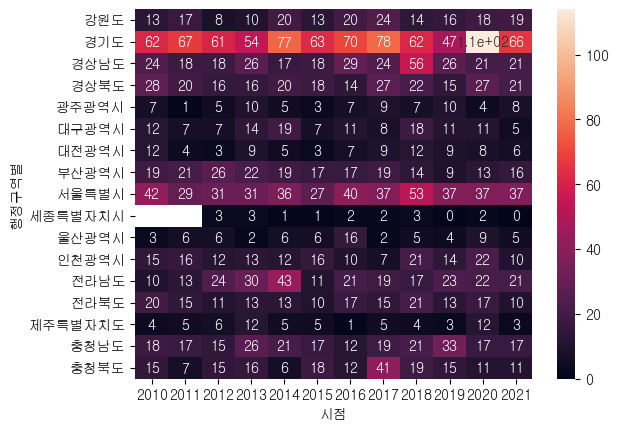

In [5]:
df1 = pd_byarea.pivot('행정구역별', '시점', '사망 (명)')
sns.heatmap(df1, annot=True)

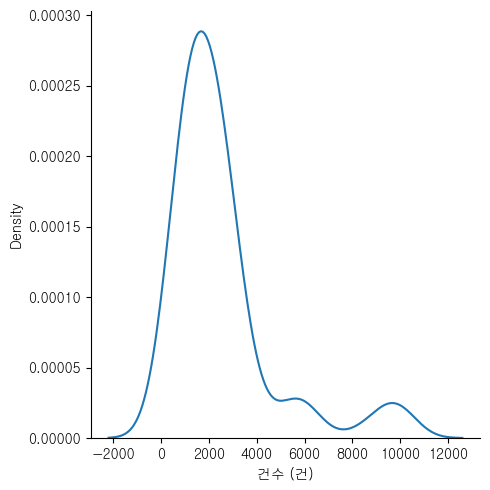

In [16]:
# print(pd_byarea['시점'].value_counts())
# sns.displot(data = pd_byarea, x = '시점')
# print(pd_byarea['건수 (건)'].value_counts())
sns.displot(data = pd_byarea, x = '건수 (건)', kind = 'kde')
# sns.displot(data = pd_byarea, x = '시점', y = '건수 (건)', kind = 'kde')

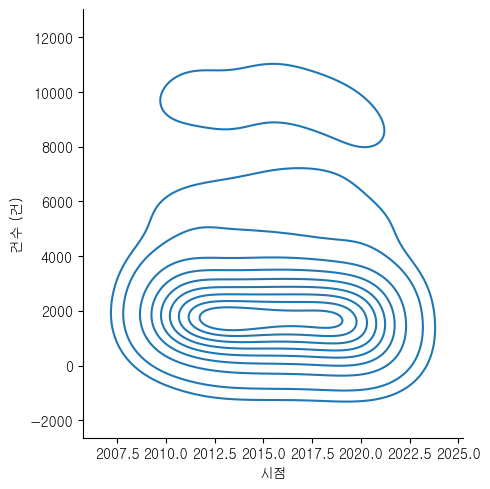

In [17]:
sns.displot(data = pd_byarea, x = '시점', y = '건수 (건)', kind = 'kde')

C:\Users\ITPS\AppData\Local\Temp\ipykernel_14656\2118810740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_national['시점'] = pd_national['시점'].astype(np.int64)


<AxesSubplot: ylabel='사망 (명)'>

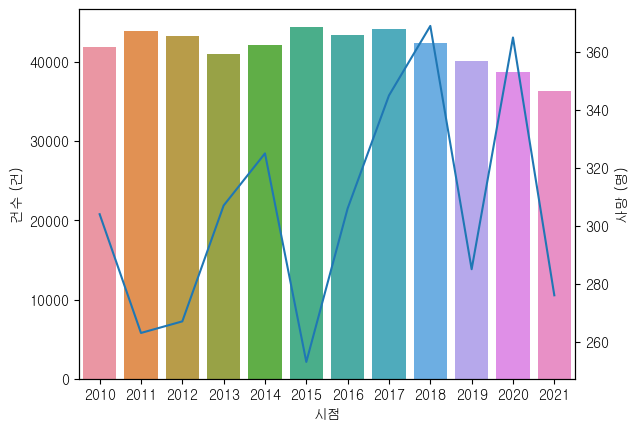

In [24]:
pd_national['시점'] = pd_national['시점'].astype(np.int64)

ax1 = sns.barplot(data = pd_national, x = '시점', y = '건수 (건)')

ax2 = ax1.twinx()
ax2.set_xlim(ax1.get_xlim())
# sns.lineplot(data = pd_national, x = np.linspace(0, 11, 12), y = '사망 (명)', ax = ax2)
sns.lineplot(data = pd_national, x = np.arange(12), y = '사망 (명)', ax = ax2)